<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.149383,10.198125,51.347509,40.213569,11.133940
1,0.0,1.0,68.371701,4.858040,83.229741,78.524702,4.705039
2,0.0,2.0,43.810902,-21.193472,32.617430,53.245458,-20.628028
3,0.0,3.0,46.494482,-7.496310,48.998172,56.007537,-7.009365
4,0.0,4.0,96.719309,2.895547,109.614855,107.701523,1.913332
...,...,...,...,...,...,...,...
249995,999.0,245.0,41.329737,8.886786,60.216522,52.733948,7.482574
249996,999.0,246.0,22.708933,-0.908641,31.800293,33.972475,-2.172182
249997,999.0,247.0,58.034742,14.457779,82.492520,69.565150,12.927370
249998,999.0,248.0,59.573177,-0.108383,69.464794,71.115207,-1.650414


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    31.149383  10.198125   51.347509   40.213569  11.133940
      1.0    68.371701   4.858040   83.229741   78.524702   4.705039
      2.0    43.810902 -21.193472   32.617430   53.245458 -20.628028
      3.0    46.494482  -7.496310   48.998172   56.007537  -7.009365
      4.0    96.719309   2.895547  109.614855  107.701523   1.913332
...                ...        ...         ...         ...        ...
999.0 245.0  41.329737   8.886786   60.216522   52.733948   7.482574
      246.0  22.708933  -0.908641   31.800293   33.972475  -2.172182
      247.0  58.034742  14.457779   82.492520   69.565150  12.927370
      248.0  59.573177  -0.108383   69.464794   71.115207  -1.650414
      249.0  54.274606   3.192447   67.467053   65.776609   1.690444

[250000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    31.149383  10.198125   51.347509   40.213569  11.133940
      1.0    68.371701   4.858040   83.229741   78.524702   4.705039
      2.0    43.810902 -21.193472   32.617430   53.245458 -20.628028
      3.0    46.494482  -7.496310   48.998172   56.007537  -7.009365
      4.0    96.719309   2.895547  109.614855  107.701523   1.913332
...                ...        ...         ...         ...        ...
999.0 245.0  41.329737   8.886786   60.216522   52.733948   7.482574
      246.0  22.708933  -0.908641   31.800293   33.972475  -2.172182
      247.0  58.034742  14.457779   82.492520   69.565150  12.927370
      248.0  59.573177  -0.108383   69.464794   71.115207  -1.650414
      249.0  54.274606   3.192447   67.467053   65.776609   1.690444

[250000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,31.149383,10.198125,51.347509,40.213569,11.133940
1,0.0,1.0,68.371701,4.858040,83.229741,78.524702,4.705039
2,0.0,2.0,43.810902,-21.193472,32.617430,53.245458,-20.628028
3,0.0,3.0,46.494482,-7.496310,48.998172,56.007537,-7.009365
4,0.0,4.0,96.719309,2.895547,109.614855,107.701523,1.913332
...,...,...,...,...,...,...,...
249995,999.0,245.0,41.329737,8.886786,60.216522,52.733948,7.482574
249996,999.0,246.0,22.708933,-0.908641,31.800293,33.972475,-2.172182
249997,999.0,247.0,58.034742,14.457779,82.492520,69.565150,12.927370
249998,999.0,248.0,59.573177,-0.108383,69.464794,71.115207,-1.650414


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1          e           Y       y_hat      e_hat
rep   index                                                         
0.0   0.0    31.149383  10.198125   51.347509   40.213569  11.133940
      1.0    68.371701   4.858040   83.229741   78.524702   4.705039
      2.0    43.810902 -21.193472   32.617430   53.245458 -20.628028
      3.0    46.494482  -7.496310   48.998172   56.007537  -7.009365
      4.0    96.719309   2.895547  109.614855  107.701523   1.913332
...                ...        ...         ...         ...        ...
999.0 245.0  41.329737   8.886786   60.216522   52.733948   7.482574
      246.0  22.708933  -0.908641   31.800293   33.972475  -2.172182
      247.0  58.034742  14.457779   82.492520   69.565150  12.927370
      248.0  59.573177  -0.108383   69.464794   71.115207  -1.650414
      249.0  54.274606   3.192447   67.467053   65.776609   1.690444

[250000 rows x 5 columns]

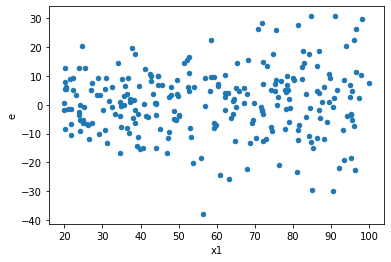

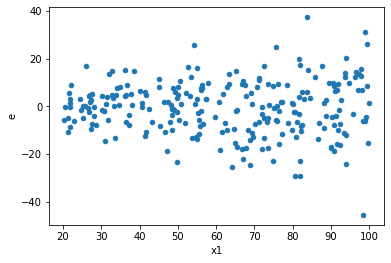

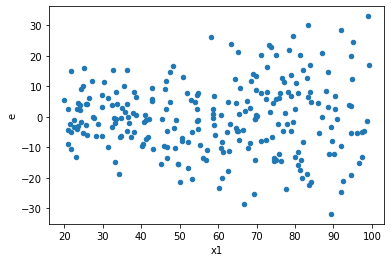

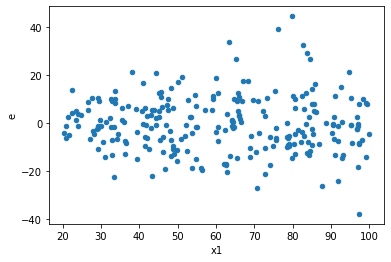

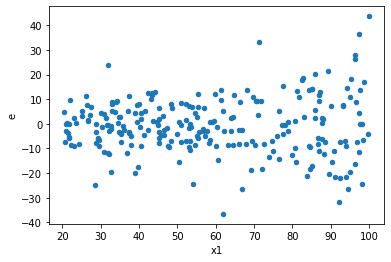

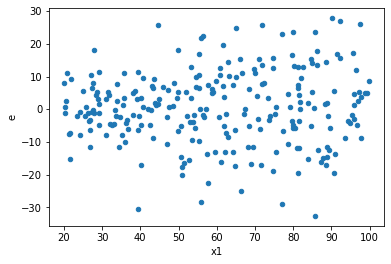

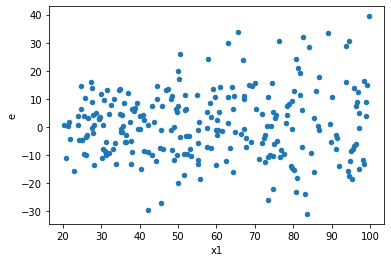

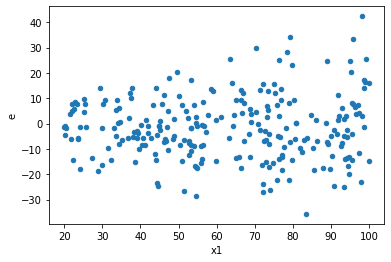

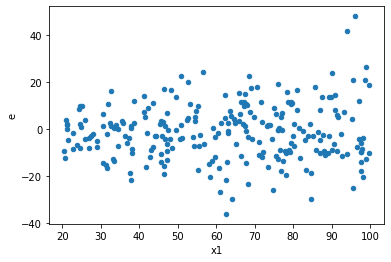

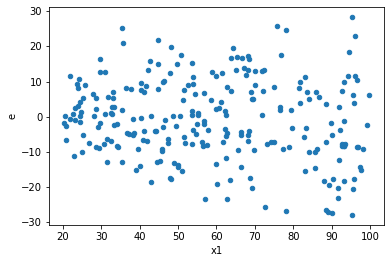

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,127.0,121.0,11609.255502433596,20517.92795455797,91.41146064908344,169.56965251700802,1.8550152389311838,0.0006838837336948789,0.9996580581331526,0.00034194186684743944,Reject005=0 : Heteroscedasticity
5.0,111.0,137.0,9339.362395817481,25348.934690470316,84.13839996231965,185.02872036839648,2.199099584152531,1.2705439301763377e-05,0.9999936472803491,6.3527196508816886e-06,Reject005=0 : Heteroscedasticity
7.0,127.0,121.0,10198.421658130475,30695.448789762373,80.30253274118485,253.68139495671383,3.159070907194537,5.725149243573924e-10,0.9999999997137425,2.862574621786962e-10,Reject005=0 : Heteroscedasticity
8.0,127.0,121.0,11000.985934421687,27054.724525785634,86.62193649150935,223.59276467591434,2.5812487428958693,2.554558435896581e-07,0.9999998722720782,1.2772792179482906e-07,Reject005=0 : Heteroscedasticity
10.0,120.0,128.0,10439.990824425036,21158.600299933438,86.9999235368753,165.30156484322998,1.9000196566054013,0.00038705631250768313,0.9998064718437462,0.00019352815625384157,Reject005=0 : Heteroscedasticity
12.0,114.0,134.0,7895.4939954702,25168.14807166952,69.25871925851052,187.82200053484715,2.7118896009872078,3.971318873752239e-08,0.9999999801434056,1.9856594368761193e-08,Reject005=0 : Heteroscedasticity
14.0,145.0,103.0,10151.811024778688,21218.17812011467,70.01248982605992,206.00172932150164,2.94235685423123,2.0469256956090476e-08,0.9999999897653715,1.0234628478045238e-08,Reject005=0 : Heteroscedasticity
16.0,131.0,117.0,12598.387068990487,24068.62081606583,96.17089365641593,205.71470782962248,2.139053719980676,3.515086330296846e-05,0.9999824245683485,1.757543165148423e-05,Reject005=0 : Heteroscedasticity
18.0,108.0,140.0,9829.74968200251,25239.36703621276,91.0162007592825,180.28119311580542,1.9807593770323249,0.000148921349604203,0.9999255393251979,7.44606748021015e-05,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,127.0,121.0,11609.255502433596,20517.92795455797,91.41146064908344,169.56965251700802,1.8550152389311838,0.0006838837336948789,Reject005=0 : Heteroscedasticity
1.0,119.0,129.0,22766.121339956484,9296.63368388866,191.31194403324776,72.06692778208263,0.3766985283969424,1.268492711440798e-07,Reject005=0 : Heteroscedasticity
2.0,119.0,129.0,25765.498828579868,11484.487126282516,216.51679687882242,89.02703198668617,0.4111784086502618,1.3878127567214222e-06,Reject005=0 : Heteroscedasticity
3.0,127.0,121.0,16629.551451415555,9336.234138365642,130.9413500111461,77.15895982120365,0.589263512363632,0.0034041238932485123,Reject005=0 : Heteroscedasticity
4.0,126.0,122.0,23465.007247689893,9225.92874648042,186.2302162515071,75.62236677442968,0.40606926360596807,7.8686188810518e-07,Reject005=0 : Heteroscedasticity
5.0,111.0,137.0,9339.362395817481,25348.934690470316,84.13839996231965,185.02872036839648,2.199099584152531,1.2705439301763377e-05,Reject005=0 : Heteroscedasticity
6.0,114.0,134.0,21037.746124364225,10498.351944834934,184.54163266986163,78.3459100360816,0.4245432800317727,3.838872054616466e-06,Reject005=0 : Heteroscedasticity
7.0,127.0,121.0,10198.421658130475,30695.448789762373,80.30253274118485,253.68139495671383,3.159070907194537,5.725149243573924e-10,Reject005=0 : Heteroscedasticity
8.0,127.0,121.0,11000.985934421687,27054.724525785634,86.62193649150935,223.59276467591434,2.5812487428958693,2.554558435896581e-07,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    995
Reject005=1 : Homoscedasticity        5
Name: Result_test, dtype: int64